# Read the dataset

In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 30

In [286]:
df = pd.read_csv('tubes2_HeartDisease_train.csv')
df_eval = pd.read_csv('tubes2_HeartDisease_test.csv')

In [287]:
target = df['Column14']
df.drop("Column14" ,axis = 1,inplace=True)

# Feature Engineering

## 1. Null Imputation

In [288]:
for column in list(df):
    temp = []
    for value in df[column]:
        if value == '?':
            temp.append(np.nan)
        else:
            temp.append(value)
    df[column] = temp
    
for column in list(df_eval):
    temp = []
    for value in df_eval[column]:
        if value == '?':
            temp.append(np.nan)
        else:
            temp.append(value)
    df_eval[column] = temp

In [289]:

for column in list(df):
    df[column] = df[column].fillna(df[column].median())


for column in list(df_eval):
    df_eval[column] = df_eval[column].fillna(df_eval[column].median())


In [290]:
df['Column7'] = df['Column7'].fillna(df['Column7'].median())

## 2. Change data type

In [291]:
df['Column4'] = df['Column4'].astype('int64')
df['Column5'] = df['Column5'].astype('int64')
df['Column6'] = df['Column6'].astype('int64')
df['Column7'] = df['Column7'].astype('int64')
df['Column8'] = df['Column8'].astype('int64')
df['Column9'] = df['Column9'].astype('int64')
df['Column10'] = df['Column10'].astype('float64')
df['Column11'] = df['Column11'].astype('int64')
df['Column12'] = df['Column12'].astype('int64')
df['Column13'] = df['Column13'].astype('int64')

In [292]:
df_eval['Column4'] = df_eval['Column4'].astype('int64')
df_eval['Column5'] = df_eval['Column5'].astype('int64')
df_eval['Column6'] = df_eval['Column6'].astype('int64')
df_eval['Column7'] = df_eval['Column7'].astype('int64')
df_eval['Column8'] = df_eval['Column8'].astype('int64')
df_eval['Column9'] = df_eval['Column9'].astype('int64')
df_eval['Column10'] = df_eval['Column10'].astype('float64')
df_eval['Column11'] = df['Column11'].astype('int64')
df_eval['Column12'] = df_eval['Column12'].astype('int64')
df_eval['Column13'] = df_eval['Column13'].astype('int64')

In [293]:
# from sklearn import preprocessing
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression

# le = preprocessing.LabelEncoder()

# for column in df:
#     le.fit(df[column])
#     df[column] = le.transform(df[column])

# for column in df_eval:
#     le.fit(df_eval[column])
#     df_eval[column] = le.transform(df_eval[column])
    
# #feature extraction
# model = LogisticRegression()
# rfe = RFE(model, 1)
# fit = rfe.fit(df, target)
# print("Feature Ranking: ")
# print(fit.ranking_)

## 3. Deal with imbalance data

In [294]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(df, target)
print('Resampled data train shape %s' % Counter(y_res))

Resampled data train shape Counter({1: 349, 0: 349, 3: 349, 2: 349, 4: 349})


In [295]:
df = pd.DataFrame({'Column1':X_res[:,0],'Column2':X_res[:,1],'Column3':X_res[:,2],'Column4':X_res[:,3],'Column5':X_res[:,4],'Column6':X_res[:,5],'Column7':X_res[:,6],'Column8':X_res[:,7],'Column9':X_res[:,8],'Column10':X_res[:,9],'Column11':X_res[:,10],'Column12':X_res[:,11],'Column13':X_res[:,12]})
df['Column14'] = y_res
target = df['Column14']
df.drop("Column14" ,axis = 1,inplace=True)

#  Modeling

## 1. Confusion Matrix

In [296]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

classes = ['0','1','2','3','4']

## 2. Split the data

In [297]:
from sklearn.model_selection import train_test_split

In [298]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.20, random_state=42)

## 3. Naive Bayes

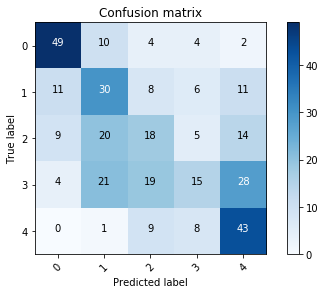

In [299]:
from sklearn.naive_bayes import GaussianNB

naivebayes = GaussianNB()
model_nb = naivebayes.fit(X_train,y_train)
nb_predict = model_nb.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test, nb_predict), classes)

In [300]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support

print("Without CV")
report_lr = precision_recall_fscore_support(y_test, nb_predict, average='weighted')
print ("Precision = %0.6f\nRecall = %0.6f\nF1 = %0.6f\nAccuracy = %0.6f\n" % \
           (report_lr[0], report_lr[1], report_lr[2], accuracy_score(y_test,nb_predict)))

print("Cross Validation 10")
acc_scores = cross_val_score(model_nb, df, target, cv=10, scoring='accuracy')
print("Accuracy: %0.6f (+/- %0.6f)" % (acc_scores.mean(), acc_scores.std() * 2))

prec_scores = cross_val_score(model_nb, df, target, cv=10, scoring='precision_weighted')
print("Precision: %0.6f (+/- %0.6f)" % (prec_scores.mean(), prec_scores.std() * 2))

recall_scores = cross_val_score(model_nb, df, target, cv=10, scoring='recall_weighted')
print("Recall: %0.6f (+/- %0.6f)" % (recall_scores.mean(), recall_scores.std() * 2))

f1_scores = cross_val_score(model_nb, df, target, cv=10, scoring='f1_weighted')
print("F1: %0.6f (+/- %0.6f)" % (f1_scores.mean(), f1_scores.std() * 2))

Without CV
Precision = 0.435678
Recall = 0.444126
F1 = 0.422382
Accuracy = 0.444126

Cross Validation 10
Accuracy: 0.482639 (+/- 0.053470)
Precision: 0.472265 (+/- 0.067249)
Recall: 0.482639 (+/- 0.053470)
F1: 0.466460 (+/- 0.055770)


## 4. MLP

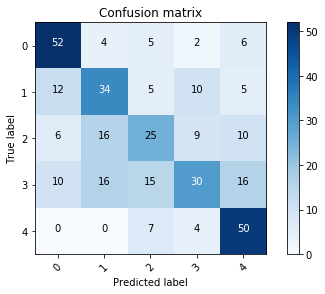

In [301]:
#mlp
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(40),random_state=1, max_iter = 1000)
model_mlp = mlp.fit(X_train,y_train)
mlp_predict = model_mlp.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test, mlp_predict), classes)

In [302]:
print("Without CV")
report_lr = precision_recall_fscore_support(y_test, mlp_predict, average='weighted')
print ("Precision = %0.6f\nRecall = %0.6f\nF1 = %0.6f\nAccuracy = %0.6f\n" % \
           (report_lr[0], report_lr[1], report_lr[2], accuracy_score(y_test,mlp_predict)))

print("Cross Validation 10")
acc_scores = cross_val_score(model_mlp, df, target, cv=10, scoring='accuracy')
print("Accuracy: %0.6f (+/- %0.6f)" % (acc_scores.mean(), acc_scores.std() * 2))

prec_scores = cross_val_score(model_mlp, df, target, cv=10, scoring='precision_weighted')
print("Precision: %0.6f (+/- %0.6f)" % (prec_scores.mean(), prec_scores.std() * 2))

recall_scores = cross_val_score(model_mlp, df, target, cv=10, scoring='recall_weighted')
print("Recall: %0.6f (+/- %0.6f)" % (recall_scores.mean(), recall_scores.std() * 2))

f1_scores = cross_val_score(model_mlp, df, target, cv=10, scoring='f1_weighted')
print("F1: %0.6f (+/- %0.6f)" % (f1_scores.mean(), f1_scores.std() * 2))

Without CV
Precision = 0.539732
Recall = 0.547278
F1 = 0.532857
Accuracy = 0.547278

Cross Validation 10
Accuracy: 0.561563 (+/- 0.065988)
Precision: 0.555232 (+/- 0.072996)
Recall: 0.561563 (+/- 0.065988)
F1: 0.551372 (+/- 0.070349)


## 5. KNN

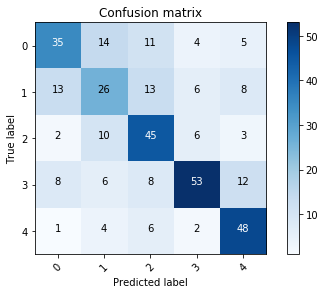

In [303]:
#knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
model_knn = knn.fit(X_train,y_train)
knn_predict = model_knn.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test, knn_predict), classes)

In [304]:
print("Without CV")
report_lr = precision_recall_fscore_support(y_test, knn_predict, average='weighted')
print ("Precision = %0.6f\nRecall = %0.6f\nF1 = %0.6f\nAccuracy = %0.6f\n" % \
           (report_lr[0], report_lr[1], report_lr[2], accuracy_score(y_test,knn_predict)))

print("Cross Validation 10")
acc_scores = cross_val_score(model_knn, df, target, cv=10, scoring='accuracy')
print("Accuracy: %0.6f (+/- %0.6f)" % (acc_scores.mean(), acc_scores.std() * 2))

prec_scores = cross_val_score(model_knn, df, target, cv=10, scoring='precision_weighted')
print("Precision: %0.6f (+/- %0.6f)" % (prec_scores.mean(), prec_scores.std() * 2))

recall_scores = cross_val_score(model_knn, df, target, cv=10, scoring='recall_weighted')
print("Recall: %0.6f (+/- %0.6f)" % (recall_scores.mean(), recall_scores.std() * 2))

f1_scores = cross_val_score(model_knn, df, target, cv=10, scoring='f1_weighted')
print("F1: %0.6f (+/- %0.6f)" % (f1_scores.mean(), f1_scores.std() * 2))

Without CV
Precision = 0.598239
Recall = 0.593123
F1 = 0.590114
Accuracy = 0.593123

Cross Validation 10
Accuracy: 0.651160 (+/- 0.078748)
Precision: 0.648429 (+/- 0.076876)
Recall: 0.651160 (+/- 0.078748)
F1: 0.644144 (+/- 0.080229)


## 6. Decision Tree Learning

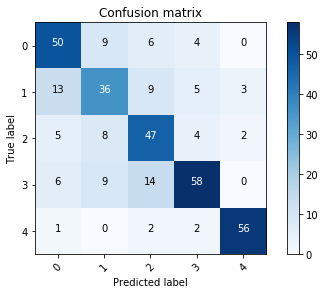

In [305]:
from sklearn import tree

tree_dtl = tree.DecisionTreeClassifier()
model_tree = tree_dtl.fit(X_train,y_train)
tree_predict = model_tree.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test, tree_predict), classes)

In [306]:
print("Without CV")
report_lr = precision_recall_fscore_support(y_test, tree_predict, average='weighted')
print ("Precision = %0.6f\nRecall = %0.6f\nF1 = %0.6f\nAccuracy = %0.6f\n" % \
           (report_lr[0], report_lr[1], report_lr[2], accuracy_score(y_test,tree_predict)))

print("Cross Validation 10")
acc_scores = cross_val_score(model_tree, df, target, cv=10, scoring='accuracy')
print("Accuracy: %0.6f (+/- %0.6f)" % (acc_scores.mean(), acc_scores.std() * 2))

prec_scores = cross_val_score(model_tree, df, target, cv=10, scoring='precision_weighted')
print("Precision: %0.6f (+/- %0.6f)" % (prec_scores.mean(), prec_scores.std() * 2))

recall_scores = cross_val_score(model_tree, df, target, cv=10, scoring='recall_weighted')
print("Recall: %0.6f (+/- %0.6f)" % (recall_scores.mean(), recall_scores.std() * 2))

f1_scores = cross_val_score(model_tree, df, target, cv=10, scoring='f1_weighted')
print("F1: %0.6f (+/- %0.6f)" % (f1_scores.mean(), f1_scores.std() * 2))

Without CV
Precision = 0.714083
Recall = 0.707736
F1 = 0.708309
Accuracy = 0.707736

Cross Validation 10
Accuracy: 0.702672 (+/- 0.127990)
Precision: 0.710094 (+/- 0.128069)
Recall: 0.700403 (+/- 0.143388)
F1: 0.698741 (+/- 0.134946)


# Save best model to external file

In [307]:
from sklearn.externals import joblib
joblib.dump(model_tree, 'TREE.dat')

['TREE.dat']

In [308]:
model_tree = joblib.load('TREE.dat')

In [309]:
prob = model_tree.predict(df_eval)

# Predict test data

In [310]:
diagnose = []
for probitem in prob:
    if (probitem == 0):
        diagnose.append('absence')
    else:
        diagnose.append('presence')

In [311]:
df_eval['predict'] = prob
df_eval['diagnose'] = diagnose

In [312]:
df_eval['predict'].value_counts()

0    65
1    38
2    17
3    15
4     6
Name: predict, dtype: int64

In [313]:
df

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13
0,54.000000,1.000000,4.000000,125.000000,216.000000,0.000000,0.000000,140.000000,0.000000,0.000000,2.000000,0.000000,6.000000
1,55.000000,1.000000,4.000000,158.000000,217.000000,0.000000,0.000000,110.000000,1.000000,2.500000,2.000000,0.000000,6.000000
2,54.000000,0.000000,3.000000,135.000000,304.000000,1.000000,0.000000,170.000000,0.000000,0.000000,1.000000,0.000000,3.000000
3,48.000000,0.000000,3.000000,120.000000,195.000000,0.000000,0.000000,125.000000,0.000000,0.000000,2.000000,0.000000,6.000000
4,50.000000,1.000000,4.000000,120.000000,0.000000,0.000000,1.000000,156.000000,1.000000,0.000000,1.000000,0.000000,6.000000
5,64.000000,0.000000,4.000000,130.000000,303.000000,0.000000,0.000000,122.000000,0.000000,2.000000,2.000000,2.000000,3.000000
6,63.000000,1.000000,4.000000,130.000000,308.000000,0.000000,0.000000,138.000000,1.000000,2.000000,2.000000,0.000000,6.000000
7,58.000000,1.000000,2.000000,130.000000,251.000000,0.000000,0.000000,110.000000,0.000000,0.000000,2.000000,0.000000,6.000000
8,42.000000,1.000000,2.000000,150.000000,268.000000,0.000000,0.000000,136.000000,0.000000,0.000000,2.000000,0.000000,6.000000
9,54.000000,1.000000,3.000000,120.000000,258.000000,0.000000,2.000000,147.000000,0.000000,4.000000,2.000000,0.000000,7.000000


In [314]:
df_eval

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,predict,diagnose
0,60,1,2,160,267,1,1,157,0,0.5,2,0,7,0,absence
1,61,1,4,148,203,0,0,161,0,0.0,2,1,7,1,presence
2,54,1,4,130,242,0,0,91,1,1.0,1,0,7,1,presence
3,48,1,4,120,260,0,0,115,0,2.0,2,0,7,3,presence
4,57,0,1,130,308,0,0,98,0,1.0,1,0,7,0,absence
5,55,1,3,130,228,0,1,133,0,1.0,2,0,7,0,absence
6,51,1,4,140,298,0,0,122,1,42.0,2,3,7,2,presence
7,62,1,4,130,170,0,1,120,1,3.0,2,0,7,4,presence
8,49,0,3,160,180,0,0,156,0,1.0,2,0,7,0,absence
9,67,0,3,115,564,0,2,160,0,16.0,2,0,7,0,absence
